## Sesi 1

### 1. Data Preparation

In [1]:
#Membaca Library Awal
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Membaca Data

status_analysis = pd.read_csv('dataset/status_analysis.csv')
service_options = pd.read_csv('dataset/service_options.csv')
online_services = pd.read_csv('dataset/online_services.csv')
payment_info = pd.read_csv('dataset/payment_info.csv')
location_data = pd.read_csv('dataset/location_data.csv')
customer_info = pd.read_csv('dataset/customer_info.csv')

In [3]:
print(status_analysis.info())
print(service_options.info())
print(online_services.info())
print(payment_info.info())
print(location_data.info())
print(customer_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         7043 non-null   object
 1   satisfaction_score  7043 non-null   int64 
 2   cltv                7043 non-null   int64 
 3   customer_status     7043 non-null   object
 4   churn_score         7043 non-null   int64 
 5   churn_label         7043 non-null   object
 6   churn_value         7043 non-null   int64 
 7   churn_category      7043 non-null   object
 8   churn_reason        1869 non-null   object
dtypes: int64(4), object(5)
memory usage: 495.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              7043 non-null   object
 1   tenure                   7043 non-null

In [4]:
# Merge datasets on customer_id

df = status_analysis.merge(service_options, on='customer_id', how='left')
df = df.merge(online_services, on='customer_id', how='left')
df = df.merge(payment_info, on='customer_id', how='left')
df = df.merge(location_data, on='customer_id', how='left')
df = df.merge(customer_info, on='customer_id', how='left')

In [5]:
#Membaca Tipe Kolom Pada Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   satisfaction_score                 7043 non-null   int64  
 2   cltv                               7043 non-null   int64  
 3   customer_status                    7043 non-null   object 
 4   churn_score                        7043 non-null   int64  
 5   churn_label                        7043 non-null   object 
 6   churn_value                        7043 non-null   int64  
 7   churn_category                     7043 non-null   object 
 8   churn_reason                       1869 non-null   object 
 9   tenure                             7043 non-null   int64  
 10  internet_service_x                 7043 non-null   object 
 11  phone_service_x                    7043 non-null   objec

In [6]:
#Menghapus Kolom Karena Tidak Akan Digunakan Dalam Analysis & Visualisasi
df = df.drop(columns=['customer_id','zip_code', 'latitude', 'longitude',
    'paperless_billing','internet_service_x','internet_service_y',
    'phone_service_x','phone_service_y','churn_label','churn_reason','offer'])
df.head()

,satisfaction_score,cltv,customer_status,churn_score,churn_value,churn_category,tenure,multiple_lines,avg_monthly_gb_download,unlimited_data,...,city,total_population,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,3,2205,Stayed,65,0,Not Applicable,9,No,16,Yes,...,Frazier Park,4498,Female,37,No,No,Yes,No,0,Yes
1,5,5414,Stayed,66,0,Not Applicable,9,Yes,10,No,...,Glendale,31297,Male,46,No,No,No,No,0,No
2,1,4479,Churned,71,1,Competitor,4,No,30,Yes,...,Costa Mesa,62069,Male,50,No,No,No,No,0,No
3,1,3714,Churned,91,1,Dissatisfaction,13,No,4,Yes,...,Martinez,46677,Male,78,No,Yes,Yes,No,0,Yes
4,1,3464,Churned,68,1,Dissatisfaction,3,No,11,Yes,...,Camarillo,42853,Female,75,No,Yes,Yes,No,0,Yes


In [7]:
#Memisahkan Kolom Numbers dan Kategori
numbers = df.select_dtypes(include = ['number']).columns
categories = df.select_dtypes(exclude = ['number']).columns

In [8]:
#Mendeskripsikan Kolom Numerik
round(df.describe(),2)

,satisfaction_score,cltv,churn_score,churn_value,tenure,avg_monthly_gb_download,number_of_referrals,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,total_population,age,number_of_dependents
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,3.24,4400.30,58.51,0.27,32.37,20.52,1.95,64.76,22.96,2280.38,1.96,6.86,749.10,3034.38,22139.81,46.51,0.47
std,1.20,1183.06,21.17,0.44,24.56,20.42,3.00,30.09,15.45,2266.22,7.90,25.10,846.66,2865.20,21152.17,16.75,0.96
min,1.00,2003.00,5.00,0.00,0.00,0.00,0.00,18.25,0.00,18.80,0.00,0.00,0.00,21.36,11.00,19.00,0.00
25%,3.00,3469.00,40.00,0.00,9.00,3.00,0.00,35.50,9.21,400.15,0.00,0.00,70.54,605.61,2344.00,32.00,0.00
50%,3.00,4527.00,61.00,0.00,29.00,17.00,0.00,70.35,22.89,1394.55,0.00,0.00,401.44,2108.64,17554.00,46.00,0.00
75%,4.00,5380.50,75.50,1.00,55.00,27.00,3.00,89.85,36.39,3786.60,0.00,0.00,1191.10,4801.15,36125.00,60.00,0.00
max,5.00,6500.00,96.00,1.00,72.00,85.00,11.00,118.75,49.99,8684.80,49.79,150.00,3564.72,11979.34,105285.00,80.00,9.00


In [9]:
#Mendeskripsikan Kolom Kategori
df[categories].describe(include='all')

,customer_status,churn_category,multiple_lines,unlimited_data,referred_a_friend,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,...,payment_method,country,state,city,gender,under_30,senior_citizen,partner,dependents,married
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,6,2,2,2,2,2,2,2,2,...,4,1,1,1106,2,2,2,2,2,2
top,Stayed,Not Applicable,No,Yes,No,No,No,No,No,No,...,Electronic check,United States,California,Los Angeles,Male,No,No,No,No,No
freq,4720,5174,4072,4745,3821,5024,4614,4621,4999,4336,...,2365,7043,7043,293,3555,5642,5901,3641,5416,3641


In [10]:
numbers

Index(['satisfaction_score', 'cltv', 'churn_score', 'churn_value', 'tenure',
       'avg_monthly_gb_download', 'number_of_referrals', 'monthly_ charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'total_population', 'age', 'number_of_dependents'],
      dtype='object')

In [11]:
categories

Index(['customer_status', 'churn_category', 'multiple_lines', 'unlimited_data',
       'referred_a_friend', 'online_security', 'online_backup',
       'device_protection', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'internet_type', 'contract',
       'payment_method', 'country', 'state', 'city', 'gender', 'under_30',
       'senior_citizen', 'partner', 'dependents', 'married'],
      dtype='object')

In [12]:
#Melihat Jumlah duplikasi baris setiap kolom
df.duplicated().sum()

np.int64(0)

In [13]:
#Melihat Jumlah Baris Yang Kosong
df.isna().sum()

satisfaction_score                      0
cltv                                    0
customer_status                         0
churn_score                             0
churn_value                             0
churn_category                          0
tenure                                  0
multiple_lines                          0
avg_monthly_gb_download                 0
unlimited_data                          0
referred_a_friend                       0
number_of_referrals                     0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                        0
streaming_music                         0
internet_type                        1526
contract                                0
payment_method                          0
monthly_ charges                        0
avg_monthly_long_distance_charges 

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

satisfaction_score                   0
cltv                                 0
customer_status                      0
churn_score                          0
churn_value                          0
churn_category                       0
tenure                               0
multiple_lines                       0
avg_monthly_gb_download              0
unlimited_data                       0
referred_a_friend                    0
number_of_referrals                  0
online_security                      0
online_backup                        0
device_protection                    0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
internet_type                        0
contract                             0
payment_method                       0
monthly_ charges                     0
avg_monthly_long_distance_charges    0
total_charges                        0
total_refunds            

In [16]:
#Menghapus Kolom Karena Tidak Akan Digunakan Dalam Pemodelan
df = df.drop(columns=['country', 'state','customer_status', 'churn_score', 'churn_category',
                      'under_30', 'senior_citizen', 'city','total_revenue','total_population',
                      'total_charges', 'gender', 'married', 'partner', 'dependents', 'number_of_dependents',
                     'avg_monthly_long_distance_charges','total_long_distance_charges','total_extra_data_charges','total_refunds'])
df.head()

,satisfaction_score,cltv,churn_value,tenure,multiple_lines,avg_monthly_gb_download,unlimited_data,referred_a_friend,number_of_referrals,online_security,...,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,payment_method,monthly_ charges,age
0,3,2205,0,9,No,16,Yes,Yes,2,No,...,No,Yes,Yes,No,No,Cable,One Year,Mailed check,65.6,37
1,5,5414,0,9,Yes,10,No,No,0,No,...,No,No,No,Yes,Yes,Cable,Month-to-Month,Mailed check,59.9,46
2,1,4479,1,4,No,30,Yes,No,0,No,...,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Electronic check,73.9,50
3,1,3714,1,13,No,4,Yes,Yes,1,No,...,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Electronic check,98.0,78
4,1,3464,1,3,No,11,Yes,Yes,3,No,...,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Mailed check,83.9,75


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_score       5517 non-null   int64  
 1   cltv                     5517 non-null   int64  
 2   churn_value              5517 non-null   int64  
 3   tenure                   5517 non-null   int64  
 4   multiple_lines           5517 non-null   object 
 5   avg_monthly_gb_download  5517 non-null   int64  
 6   unlimited_data           5517 non-null   object 
 7   referred_a_friend        5517 non-null   object 
 8   number_of_referrals      5517 non-null   int64  
 9   online_security          5517 non-null   object 
 10  online_backup            5517 non-null   object 
 11  device_protection        5517 non-null   object 
 12  premium_tech_support     5517 non-null   object 
 13  streaming_tv             5517 non-null   object 
 14  streaming_movies         5517

In [18]:
#Memisahkan Kolom Numbers dan Kategori
numbers = df.select_dtypes(include = ['number']).columns
categories = df.select_dtypes(exclude = ['number']).columns

In [19]:
#Mendeskripsikan Kolom Numerik
round(df.describe(),2)

,satisfaction_score,cltv,churn_value,tenure,avg_monthly_gb_download,number_of_referrals,monthly_ charges,age
count,5517.00,5517.00,5517.00,5517.00,5517.00,5517.00,5517.00,5517.00
mean,3.08,4407.46,0.32,32.88,26.19,1.89,76.84,47.54
std,1.21,1183.23,0.47,24.59,19.59,2.95,21.92,17.26
min,1.00,2003.00,0.00,0.00,2.00,0.00,23.45,19.00
25%,3.00,3471.00,0.00,9.00,13.00,0.00,59.95,33.00
50%,3.00,4543.00,0.00,30.00,21.00,0.00,79.45,47.00
75%,4.00,5386.00,1.00,56.00,30.00,3.00,94.45,61.00
max,5.00,6500.00,1.00,72.00,85.00,11.00,118.75,80.00


In [20]:
#Mendeskripsikan Kolom Kategori
df[categories].describe(include='all')

,multiple_lines,unlimited_data,referred_a_friend,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,payment_method
count,5517,5517,5517,5517,5517,5517,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2,2,2,2,3,3,4
top,No,Yes,No,No,No,No,No,No,No,No,Fiber Optic,Month-to-Month,Electronic check
freq,2888,4745,2989,3498,3088,3095,3473,2810,2785,3029,3035,3092,2243


In [21]:
numbers

Index(['satisfaction_score', 'cltv', 'churn_value', 'tenure',
       'avg_monthly_gb_download', 'number_of_referrals', 'monthly_ charges',
       'age'],
      dtype='object')

In [22]:
categories

Index(['multiple_lines', 'unlimited_data', 'referred_a_friend',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'internet_type', 'contract', 'payment_method'],
      dtype='object')

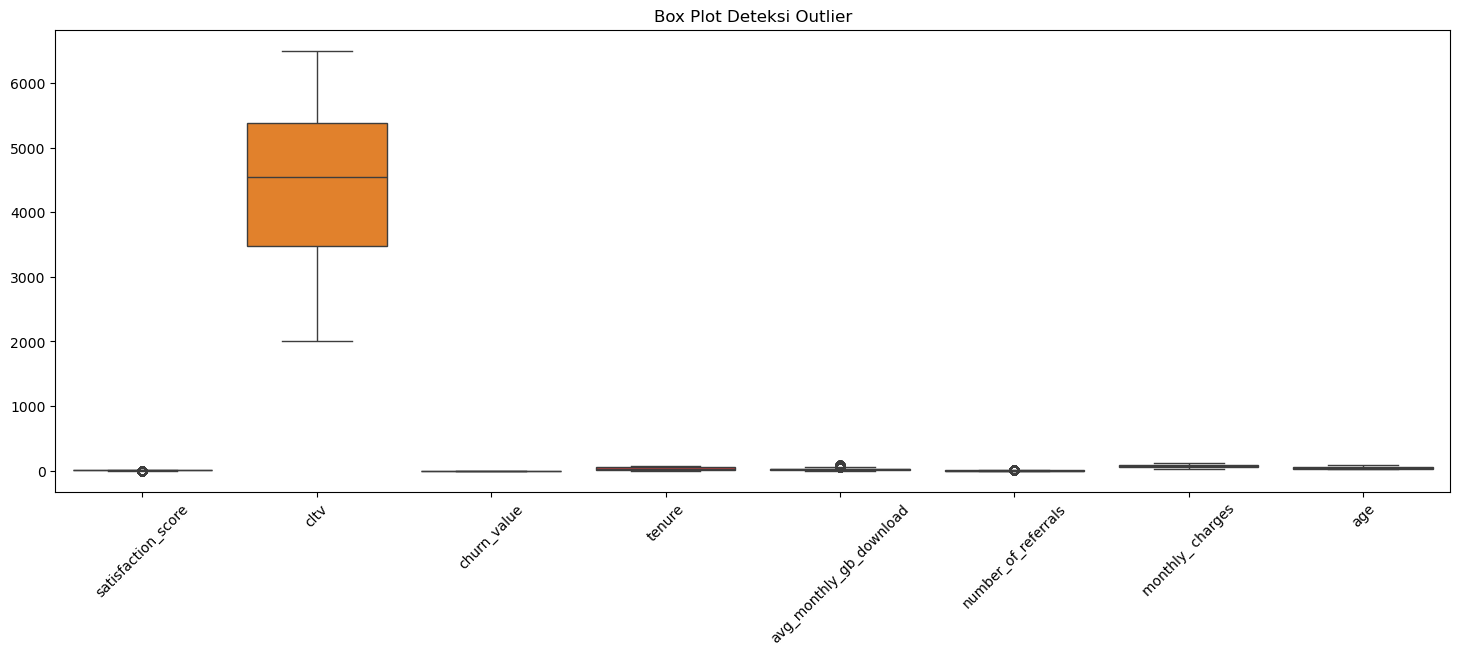

In [23]:
#Deteksi Outlier
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numbers])
plt.title("Box Plot Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Mendeteksi dengan IQR
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

# Filter baris outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis = 1)]
print('Data Outlier: ', df_outlier.shape[0], 'baris')

Data Outlier:  1868 baris


In [25]:
# Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Data sebelum: ", df.shape[0], "baris")

# Hapus baris yang memiliki outlier di salah satu kolom numerik
df = df[~((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis=1)]

print("Data sesudah: ", df.shape[0], "baris")

Data sebelum:  5517 baris
Data sesudah:  3649 baris


### 2. Pemilihan Feature

In [26]:
#Membaca ulang kolom kategorik
categories = df.select_dtypes(exclude = ['number']).columns

In [27]:
categories

Index(['multiple_lines', 'unlimited_data', 'referred_a_friend',
       'online_security', 'online_backup', 'device_protection',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'internet_type', 'contract', 'payment_method'],
      dtype='object')

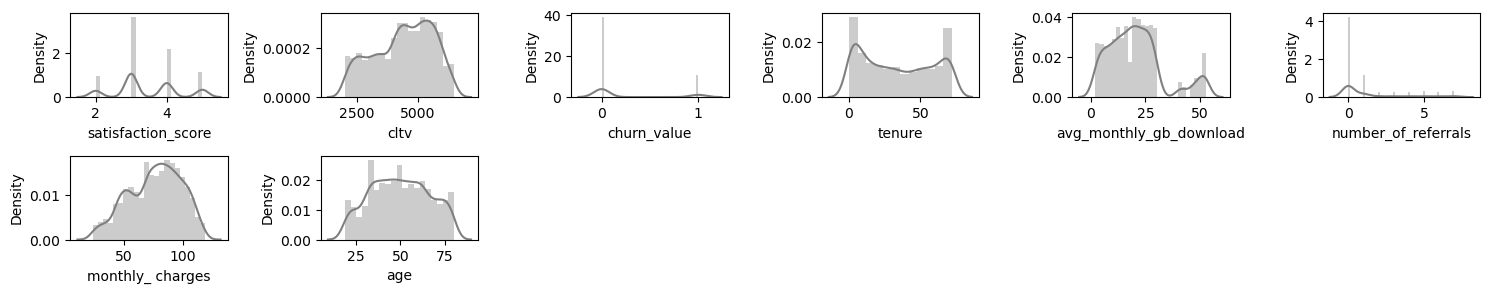

In [28]:
#Unvariat Analysis dengan Density Plot

plt.figure(figsize=(15, 3))
for i in range(0, len(numbers)):
    plt.subplot(math.ceil(len(numbers)/6), 6, i+1)
    sns.distplot(df[numbers[i]], color='gray')
    plt.tight_layout()

<Axes: >

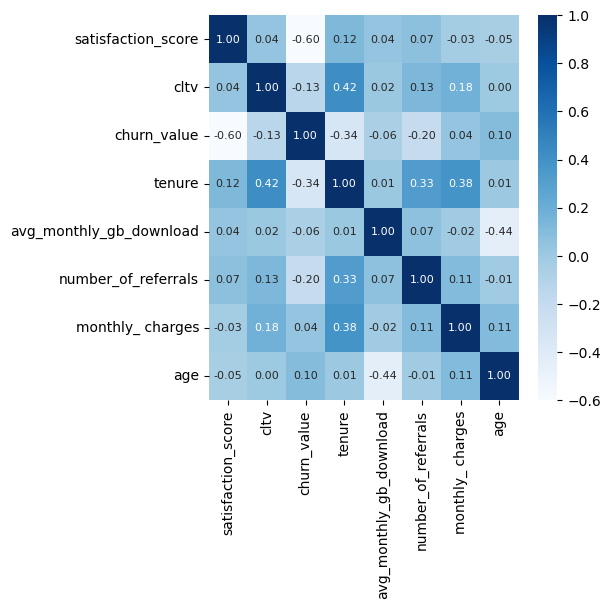

In [29]:
#Correlation Heatmap untuk melihat korelasi linear antara kolom-kolom numerik
plt.figure(figsize=(5,5))
sns.heatmap(df[numbers].corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 8})

### 3. Normalisasi Data & Encoding

In [30]:
#Menyalin data yang telah dibersihkan
df_select = df.copy()
df_select.head()

,satisfaction_score,cltv,churn_value,tenure,multiple_lines,avg_monthly_gb_download,unlimited_data,referred_a_friend,number_of_referrals,online_security,...,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,payment_method,monthly_ charges,age
0,3,2205,0,9,No,16,Yes,Yes,2,No,...,No,Yes,Yes,No,No,Cable,One Year,Mailed check,65.60,37
1,5,5414,0,9,Yes,10,No,No,0,No,...,No,No,No,Yes,Yes,Cable,Month-to-Month,Mailed check,59.90,46
6,3,5011,0,71,No,14,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,Yes,Fiber Optic,Two Year,Bank transfer (automatic),109.70,67
8,3,5525,0,7,No,21,Yes,No,0,Yes,...,No,No,No,No,No,DSL,Two Year,Electronic check,48.20,68
9,3,5509,0,65,Yes,14,Yes,Yes,3,Yes,...,Yes,Yes,Yes,Yes,Yes,Cable,Two Year,Mailed check,90.45,43


In [31]:
#Normalisasi kolom numerik dengan MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
for col in numbers:
    df_select[col] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select), 1))

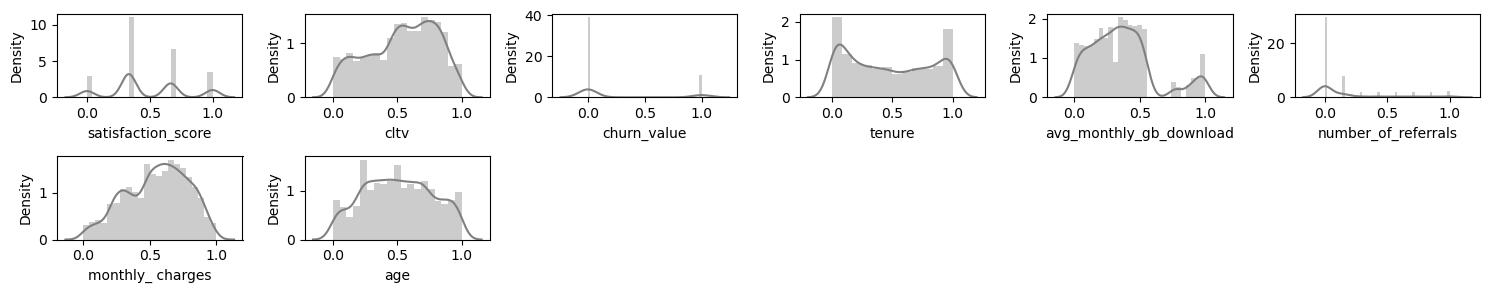

In [32]:
#Visualisasi Hasil Normalisasi dengan Density Plot
plt.figure(figsize=(15, 3))
for i in range(0, len(numbers)):
    plt.subplot(math.ceil(len(numbers)/6), 6, i+1)
    sns.distplot(df_select[numbers[i]], color='gray')
    plt.tight_layout()

In [33]:
df_select.head()

,satisfaction_score,cltv,churn_value,tenure,multiple_lines,avg_monthly_gb_download,unlimited_data,referred_a_friend,number_of_referrals,online_security,...,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,payment_method,monthly_ charges,age
0,0.333333,0.044929,0.0,0.125000,No,0.274510,Yes,Yes,0.285714,No,...,No,Yes,Yes,No,No,Cable,One Year,Mailed check,0.442288,0.295082
1,1.000000,0.758674,0.0,0.125000,Yes,0.156863,No,No,0.000000,No,...,No,No,No,Yes,Yes,Cable,Month-to-Month,Mailed check,0.382476,0.442623
6,0.333333,0.669039,0.0,0.986111,No,0.235294,Yes,Yes,0.142857,Yes,...,Yes,Yes,Yes,Yes,Yes,Fiber Optic,Two Year,Bank transfer (automatic),0.905037,0.786885
8,0.333333,0.783363,0.0,0.097222,No,0.372549,Yes,No,0.000000,Yes,...,No,No,No,No,No,DSL,Two Year,Electronic check,0.259706,0.803279
9,0.333333,0.779804,0.0,0.902778,Yes,0.235294,Yes,Yes,0.428571,Yes,...,Yes,Yes,Yes,Yes,Yes,Cable,Two Year,Mailed check,0.703043,0.393443


In [34]:
#One-Hot Encoding
df_select = pd.get_dummies(df_select, columns=categories)
df_select.head()

,satisfaction_score,cltv,churn_value,tenure,avg_monthly_gb_download,number_of_referrals,monthly_ charges,age,multiple_lines_No,multiple_lines_Yes,...,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,contract_Month-to-Month,contract_One Year,contract_Two Year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0.333333,0.044929,0.0,0.125000,0.274510,0.285714,0.442288,0.295082,True,False,...,True,False,False,False,True,False,False,False,False,True
1,1.000000,0.758674,0.0,0.125000,0.156863,0.000000,0.382476,0.442623,False,True,...,True,False,False,True,False,False,False,False,False,True
6,0.333333,0.669039,0.0,0.986111,0.235294,0.142857,0.905037,0.786885,True,False,...,False,False,True,False,False,True,True,False,False,False
8,0.333333,0.783363,0.0,0.097222,0.372549,0.000000,0.259706,0.803279,True,False,...,False,True,False,False,False,True,False,False,True,False
9,0.333333,0.779804,0.0,0.902778,0.235294,0.428571,0.703043,0.393443,False,True,...,True,False,False,False,False,True,False,False,False,True


## Sesi 2

### 4. Pra-Modeling

In [35]:
#Memisahkan variabel bebas (x) dan terikat (y)
X = df_select.drop("churn_value", axis=1)
y = df_select["churn_value"]

In [36]:
#Handle Class Imbalance
y.value_counts()

churn_value
0.0    2847
1.0     802
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hasil split
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 2919
Jumlah data test: 730


In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_balance, y_train_balance = sm.fit_resample(X_train, y_train)

In [40]:
y_train_balance.value_counts()

churn_value
0.0    2277
1.0    2277
Name: count, dtype: int64

In [41]:
print('Jumlah Data Train X:', len(x_train_balance))
print('Jumlah Data Train Y:', len(y_train_balance))

Jumlah Data Train X: 4554
Jumlah Data Train Y: 4554


### 5. Modeling

<b>K-Nearest Neighbors (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Inisiasi model KNN
model_knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

search = RandomizedSearchCV(model_knn, param_dist, n_iter=30, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

print("Best params:", search.best_params_)

Best params: {'weights': 'distance', 'n_neighbors': 28, 'metric': 'euclidean'}


In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Inisiasi model KNN
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train model
model_knn.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_knn = model_knn.predict(X_test)

train_accuracy_knn = model_knn.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_knn)

Train Accuracy: 0.9225762247344981


<b>Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inisiasi model Logistic Regression|
model_logreg = LogisticRegression()

# Train model
model_logreg.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_logreg = model_logreg.predict(X_test)

train_accuracy_logreg = model_logreg.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_logreg)

Train Accuracy: 0.9325111339499829


<b> Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Inisiasi model Decision Tree
model_dt = DecisionTreeClassifier()

# Train model
model_dt.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_dt = model_dt.predict(X_test)

train_accuracy_dt = model_dt.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_dt)

Train Accuracy: 1.0


<b>Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Inisiasi model Random Forest
model_rf = RandomForestClassifier()

# Train model
model_rf.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_rf = model_rf.predict(X_test)

train_accuracy_rf = model_rf.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_rf)

Train Accuracy: 1.0


<b> Support Vector Machine

In [47]:
# Support Vector Machine
from sklearn.svm import SVC

# Inisiasi model SVM
model_svm = SVC()

# Train model
model_svm.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_svm = model_svm.predict(X_test)

train_accuracy_svm = model_svm.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_svm)

Train Accuracy: 0.947584789311408


<b>Naive-Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

# Inisiasi model Naive Bayes
model_nb = GaussianNB()

# Train model
model_nb.fit(X_train, y_train)

# Prediksi menggunakan data test
y_pred_nb = model_nb.predict(X_test)

# Akurasi data train
train_accuracy_nb = model_nb.score(X_train, y_train)
print("Train Accuracy:", train_accuracy_nb)

Train Accuracy: 0.8499486125385406


### 6. Evaluasi

In [49]:
# Import metrik evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

<b> Logistic Regression

In [50]:
# Prediksi pada data testing
y_pred_logreg = model_logreg.predict(X_test)

# Hitung metrik evaluasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

roc_auc_logreg = roc_auc_score(y_test, model_logreg.predict_proba(X_test)[:,1])

<b> Decision Tree

In [51]:
# Prediksi pada data testing
y_pred_dt = model_dt.predict(X_test)

# Hitung metrik evaluasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

roc_auc_dt = roc_auc_score(y_test, model_dt.predict_proba(X_test)[:,1])

<b> Random Forest

In [52]:
# Prediksi pada data testing
y_pred_rf = model_rf.predict(X_test)

# Hitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])

<b> Support Vector Machine

In [53]:
# Prediksi pada data testing
y_pred_svm = model_svm.predict(X_test)

# Hitung metrik evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

<b> K-Nearest Neighbor

In [54]:
# Prediksi pada data testing
y_pred_knn = model_knn.predict(X_test)

# Hitung metrik evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

roc_auc_knn = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])

<b> Naive-Bayes

In [55]:
# Prediksi pada data testing
y_pred_nb = model_nb.predict(X_test)

# Hitung metrik evaluasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, model_nb.predict_proba(X_test)[:, 1])

<b> Rangkuman Hasil Evaluasi

In [56]:
df_evaluasi = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree','Random Forest',
               'Support Vector Machine','K-Nearest Neighbor',
               'Naive-Bayes'],
    'Akurasi' : [accuracy_logreg,accuracy_dt,accuracy_rf,
                accuracy_svm,accuracy_knn,accuracy_nb],
    'Precision' : [precision_logreg,precision_dt,precision_rf,
                  precision_svm,precision_knn,precision_nb],
    'Recall' : [recall_logreg,recall_dt,recall_rf,recall_svm,
               recall_knn,recall_nb],
    'F1 Score' : [f1_logreg,f1_dt,f1_rf,f1_svm
                 ,f1_knn,f1_nb]
})
df_evaluasi.round(3)

,Model,Akurasi,Precision,Recall,F1 Score
0,Logistic Regression,0.940,0.862,0.862,0.862
1,Decision Tree,0.937,0.848,0.869,0.858
2,Random Forest,0.949,0.942,0.819,0.876
3,Support Vector Machine,0.944,0.905,0.831,0.866
4,K-Nearest Neighbor,0.847,0.664,0.606,0.634
5,Naive-Bayes,0.841,0.598,0.838,0.698


<b> Confusion Matrix

In [57]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_nb = confusion_matrix(y_test, y_pred_nb)

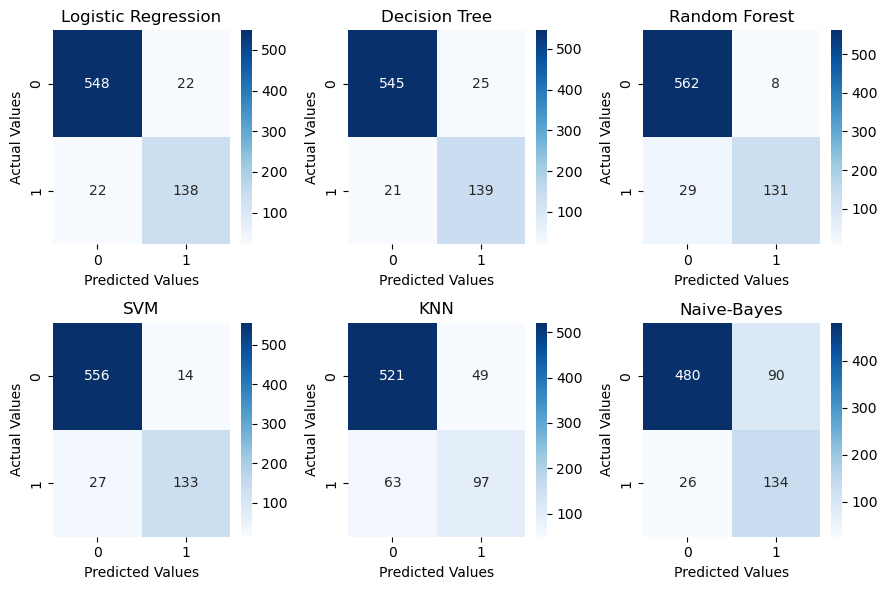

In [58]:
cm_list = [cm_logreg, cm_dt, cm_rf, cm_svm, cm_knn, cm_nb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest',
               'SVM', 'KNN', 'Naive-Bayes']
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
for i in range(len(cm_list)):
    row = i // 3
    col = i % 3
    sns.heatmap(cm_list[i], annot=True, cmap='Blues', fmt='g', ax=axes[row, col])
    axes[row, col].set_title(model_names[i])
    axes[row, col].set_ylabel('Actual Values')
    axes[row, col].set_xlabel('Predicted Values')
plt.tight_layout()
plt.show()